# Uppgift 1

För att linjärisera funktionen $C(d) = \epsilon_0 \epsilon_r \frac{A}{d}$ behöver vi göra ett variabel byte vi kan skriva det som $C(t) = kt$ där $ t = \frac{1}{d}, k = \epsilon_0 \epsilon_r A$ och i det här fallet blir m = 0

För att räkna ut $\epsilon_r$ behöver vi lösa ut den ur k $\epsilon_r = \frac{k}{\epsilon_0 A}$. Sedan kan vi använda felfortplantings formeln. $u(\epsilon_r) = \sqrt{(u(k))^2 - (\frac{u(A)}{A^2})^2}$

# Uppgift 2

För att linjärisera funktionen $U(t) = U_0 e^{-\frac{t}{\tau}}$ logaritmerar vi båda sidorna, $\ln{U(t)} = -\frac{t}{\tau} + \ln{U_0}$. Den går att skrivas på formen $y = kt + m$ om $k = -\frac{1}{\tau}$ och $m = \ln{U_0}$

Det gör att $\tau = -\frac{1}{k}$ och $u(\tau) = \sqrt{(\frac{u(k)}{k^2})^2 + u(R)^2)}$ samt $U_0 = e^m$ $u(U_0) = u(m) e^m$

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def f(x,k,m):
    return k*x + m

644.6832101268577 8.919641285022552


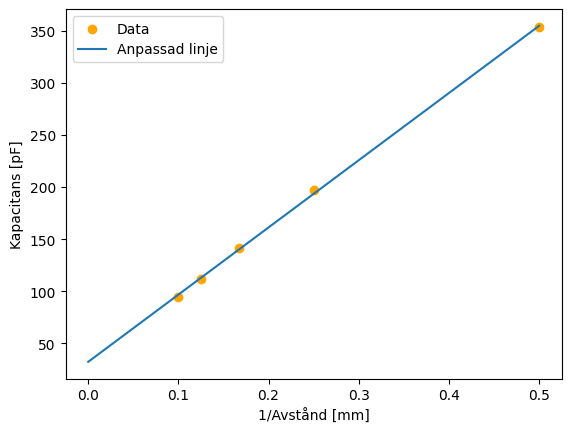

In [19]:
# 3.1 a

d = np.array([2.0, 4.0, 6.0, 8.0, 10.0])
C = np.array([353, 197, 141, 112, 94])

values, cov = curve_fit(f, 1/d, C)

k = values[0]
m = values[1]
A = 0

k_error = np.sqrt(np.diag(cov))[0]
m_error = np.sqrt(np.diag(cov))[1]
A_error = 0

#Beräkna värden
e_r = k/(A * 8.854 * 10**-12)

#Beräkna felen
e_r_error = np.sqrt(k_error**2 + (A_error/(A**2))**2)

# Gör linjen
x_linje = np.linspace(0,1/2, 100)
y_linje = k*x_linje + m

print(k,k_error)

fig, ax =  plt.subplots()

ax.scatter(1/d,C, label='Data', color='orange')
ax.plot(x_linje, y_linje, label='Anpassad linje')
#ax.fill_between(x_linje, y_linje+s_y, y_linje-s_y, alpha=0.5, color='green')
ax.set_xlabel('1/Avstånd [mm]')
ax.set_ylabel('Kapacitans [pF]')
ax.legend()

In [ ]:
# 3.1 b Vatten 

h = np.array([2.0, 4.0, 6.0, 8.0, 10.0])
C = np.array([353, 197, 141, 112, 94])

fig, ax =  plt.subplots()

ax.scatter(h,C, label='Data', color='orange')
ax.plot(x_linje, y_linje, label='Anpassad linje')
#ax.fill_between(x_linje, y_linje+s_y, y_linje-s_y, alpha=0.5, color='green')
ax.set_xlabel('1/Avstånd [mm]')
ax.set_ylabel('Kapacitans [pF]')
ax.legend()

-0.036134976229074356 0.000374182275108989


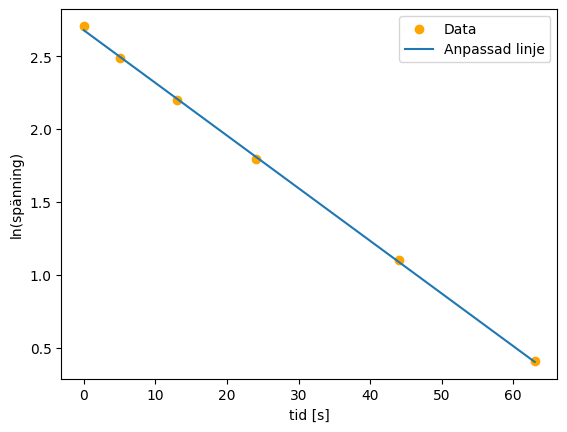

In [24]:
t = np.array([0, 5, 13, 24, 44, 63])
U = np.array([15.0, 12.0, 9.0, 6.0, 3.0, 1.5])

values, cov = curve_fit(f, t, np.log(U))

k = values[0]
m = values[1]

k_error = np.sqrt(np.diag(cov))[0]
m_error = np.sqrt(np.diag(cov))[1]
R_error = 0


# Gör linjen
x_linje = np.linspace(0,63, 100)
y_linje = k*x_linje + m

#Beräkna värdena
U_0 = np.exp(m)
tau = -1/k


#Beräkna felen
U_0_error = m_error * np.exp(m)
tau_error = np.sqrt((k_error/k**2)**2 + R_error**2)

fig, ax =  plt.subplots()

ax.scatter(t,np.log(U), label='Data', color='orange')
ax.plot(x_linje, y_linje, label='Anpassad linje')
#ax.fill_between(x_linje, y_linje+s_y, y_linje-s_y, alpha=0.5, color='green')
ax.set_xlabel('tid [s]')
ax.set_ylabel('ln(spänning)')
ax.legend()